In [1]:
library(tidyverse)
library(leaps)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
names<-c("symboling","normalized-losses","make","fuel-type","aspiration",
         "num-of-doors","body-style","drive-wheels","engine-location",
        "wheel-base","length","width","height","curb-weight","engine-type",
        "num-of-cylinders","engine-size","fuel-system","bore","stroke",
        "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price")

df<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
            col_names=names,col_types = cols(
                symboling = col_factor(),
                `normalized-losses`= col_double(),
                make = col_factor(),
                `fuel-type`= col_factor(),
                aspiration = col_factor(),
                `num-of-doors`= col_factor(),
                `body-style` = col_factor(),
                `drive-wheels` = col_factor(),
                `engine-location` = col_factor(),
                `wheel-base` = col_double(),
                length = col_double(),
                width = col_double(),
                `curb-weight` = col_double(),
                `engine-type` = col_factor(),
                `num-of-cylinders` = col_factor(),
                `engine-size` = col_double(),
                `fuel-system` = col_factor(),
                bore = col_double(),
                stroke = col_double(),
                `compression-ratio` = col_double(),
                horsepower = col_double(),
                `peak-rpm` = col_double(),
                `city-mpg` = col_double(),
                `highway-mpg` = col_double(),
                price = col_double()
                 ))%>%replace("?",NA)
head(df)

Warning message:
“One or more parsing issues, see `problems()` for details”


symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,⋯,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,?
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,NA
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,NA
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,NA
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,NA
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,NA
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,NA


In [3]:
summary(df)

 symboling normalized-losses         make      fuel-type   aspiration 
 3 :27     Min.   : 65       toyota    : 32   gas   :185   std  :168  
 1 :54     1st Qu.: 94       nissan    : 18   diesel: 20   turbo: 37  
 2 :32     Median :115       mazda     : 17                           
 0 :67     Mean   :122       honda     : 13                           
 -1:22     3rd Qu.:150       mitsubishi: 13                           
 -2: 3     Max.   :256       subaru    : 12                           
           NA's   :41        (Other)   :100                           
 num-of-doors       body-style drive-wheels engine-location   wheel-base    
 two : 89     convertible: 6   rwd: 76      front:202       Min.   : 86.60  
 four:114     hatchback  :70   fwd:120      rear :  3       1st Qu.: 94.50  
 ?   :  2     sedan      :96   4wd:  9                      Median : 97.00  
              wagon      :25                                Mean   : 98.76  
              hardtop    : 8                   

In [4]:
df_1<-df[,-27]
colnames(df_1[,26])
nrow(df_1)
nrow(na.omit(df_1))

[1] "price"

[1] 205

[1] 160

In [5]:
r_sqr<-c()
for (x in 1:25){
    r_sqr<-c(r_sqr,summary(lm(unlist(df_1[,26])~unlist(df_1[,x])))$r.squared)

}
r_sqr

[1] 0.149362866 0.041312258 0.795865804 0.012171730 0.032248431 0.004154080
 [7] 0.157043658 0.407022524 0.109601960 0.341806060 0.476967560 0.564399617
[13] 0.018356540 0.696247601 0.201557756 0.629531969 0.760968644 0.352720656
[19] 0.295322541 0.006774908 0.005056252 0.656963877 0.010332492 0.471379747
[25] 0.496591188

In [6]:
names<-colnames(df_1[,-26])
length(names)
df_sqr<-cbind(r_sqr,names)%>%as.data.frame()
df_sqr$r_sqr<-as.numeric(df_sqr$r_sqr)

[1] 25

In [7]:
head(df_sqr%>%arrange(desc(df_sqr$r_sqr)),8)

,r_sqr,names
,<dbl>,<chr>
1,0.7958658,make
2,0.7609686,engine-size
3,0.6962476,curb-weight
4,0.6569639,horsepower
5,0.6295320,num-of-cylinders
6,0.5643996,width
7,0.4965912,highway-mpg
8,0.4769676,length


- We can select the top 8 variables can explain the response variable y and see their distribution.

In [8]:
nms<-head(df_sqr%>%arrange(desc(df_sqr$r_sqr)),8)%>%select(names)%>%pull()
nms

[1] "make"             "engine-size"      "curb-weight"      "horsepower"      
[5] "num-of-cylinders" "width"            "highway-mpg"      "length"

Warning message:
“Ignoring unknown parameters: bins”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



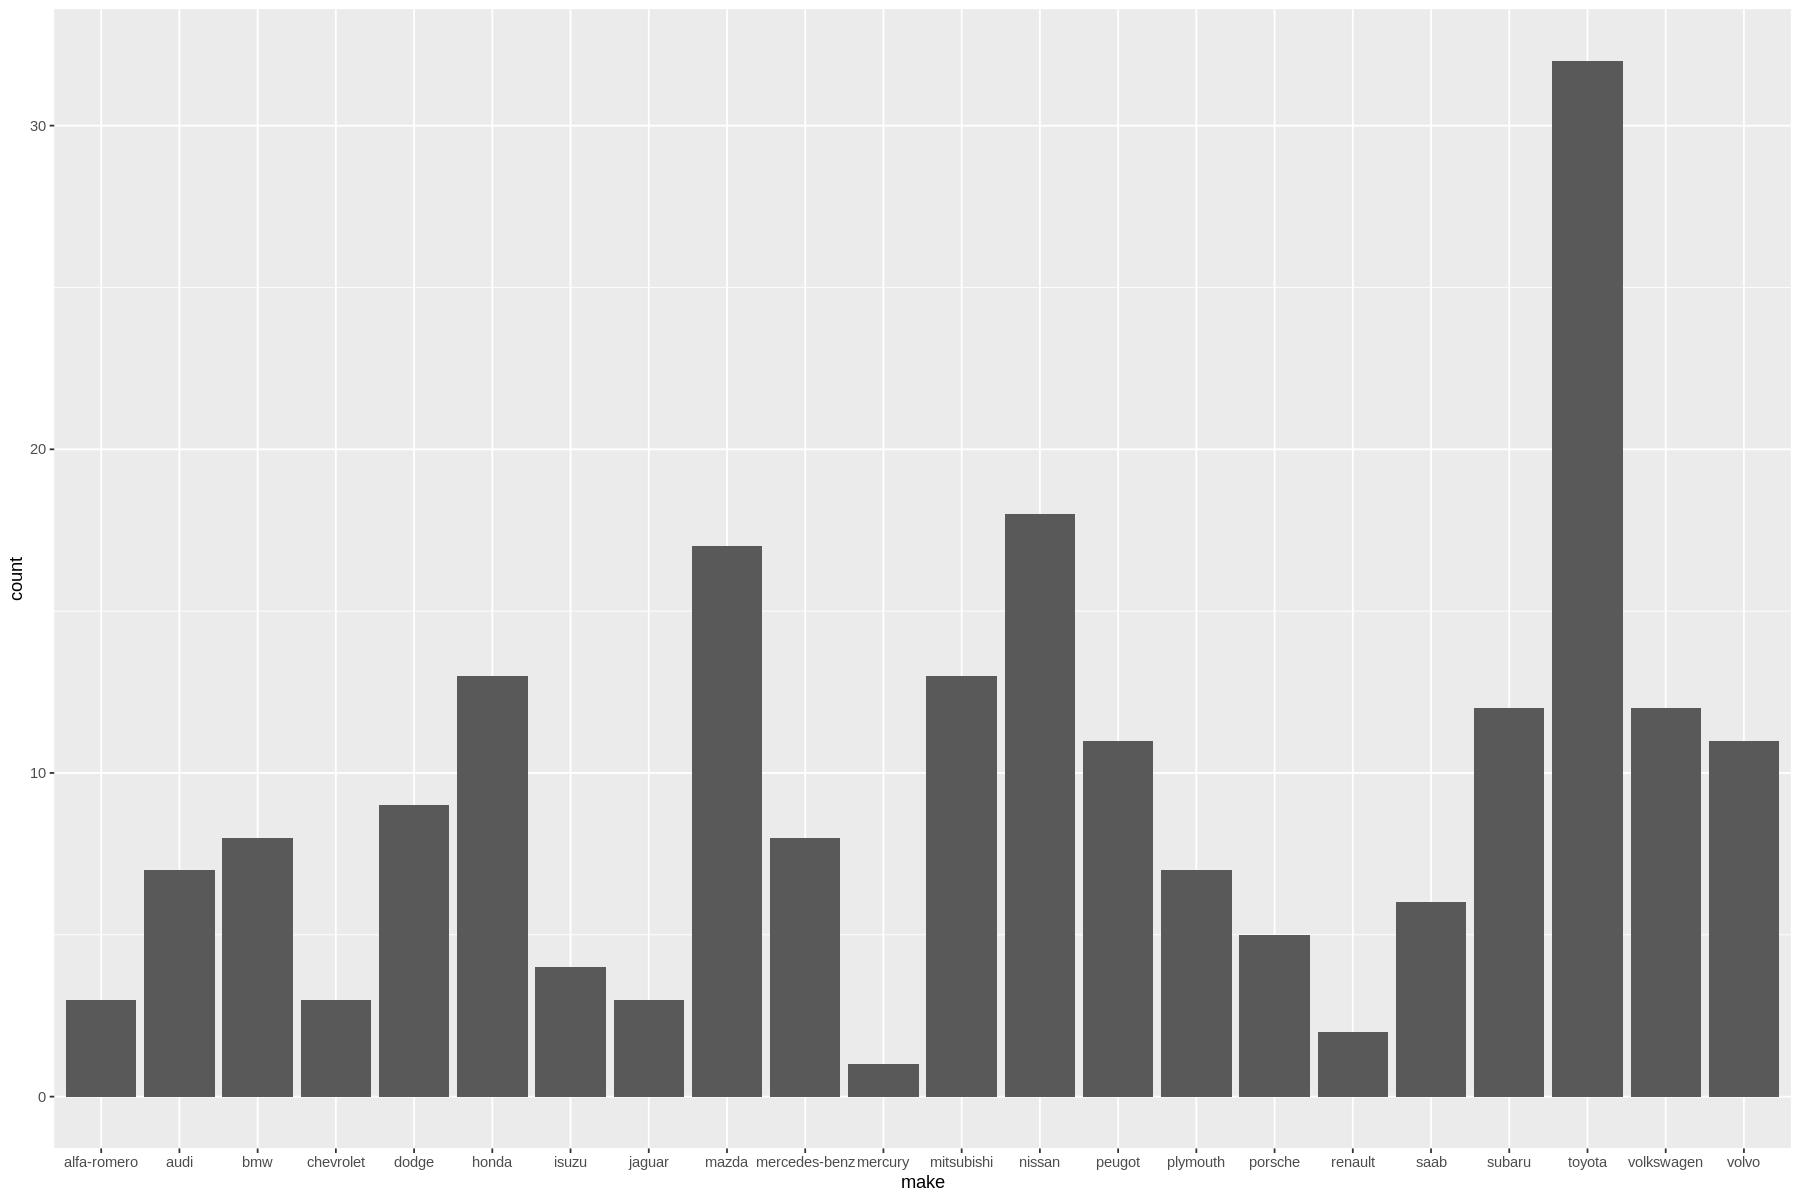

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


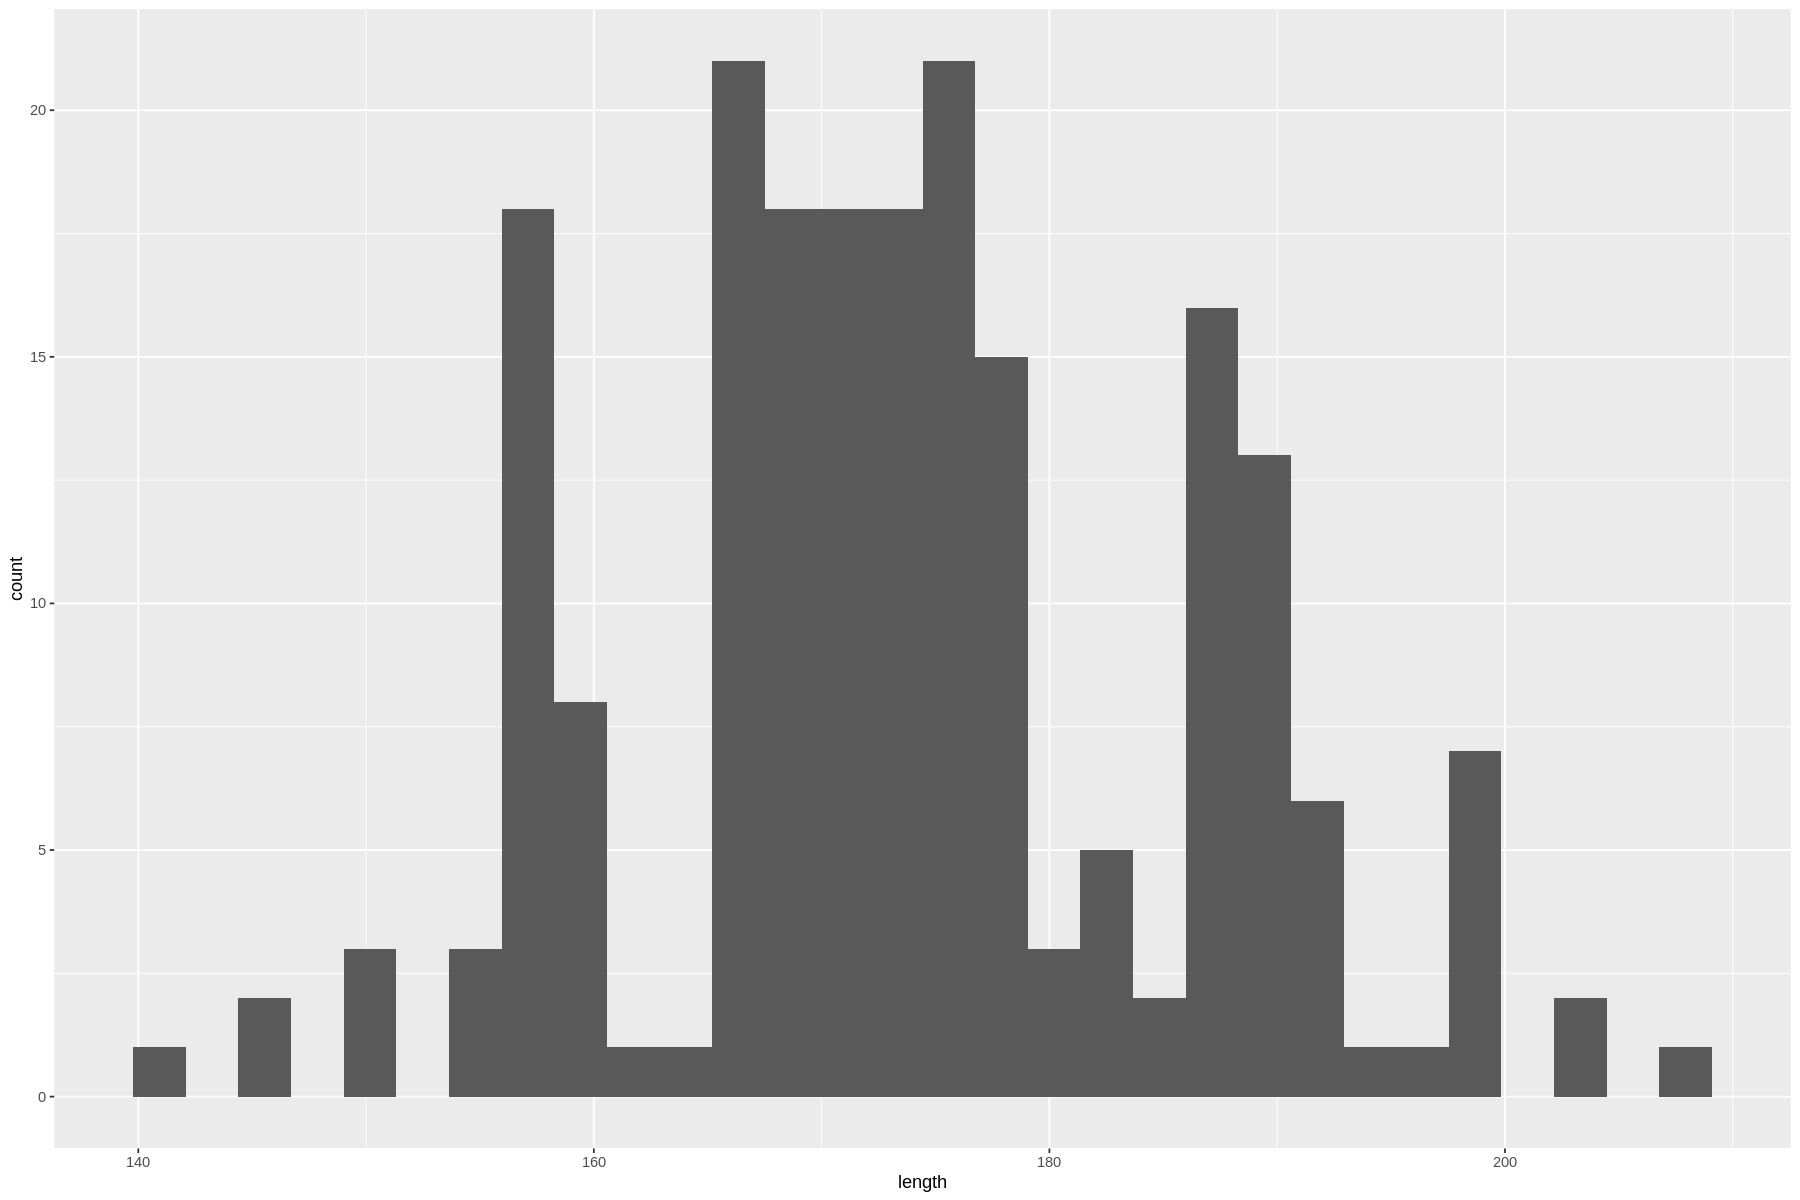

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



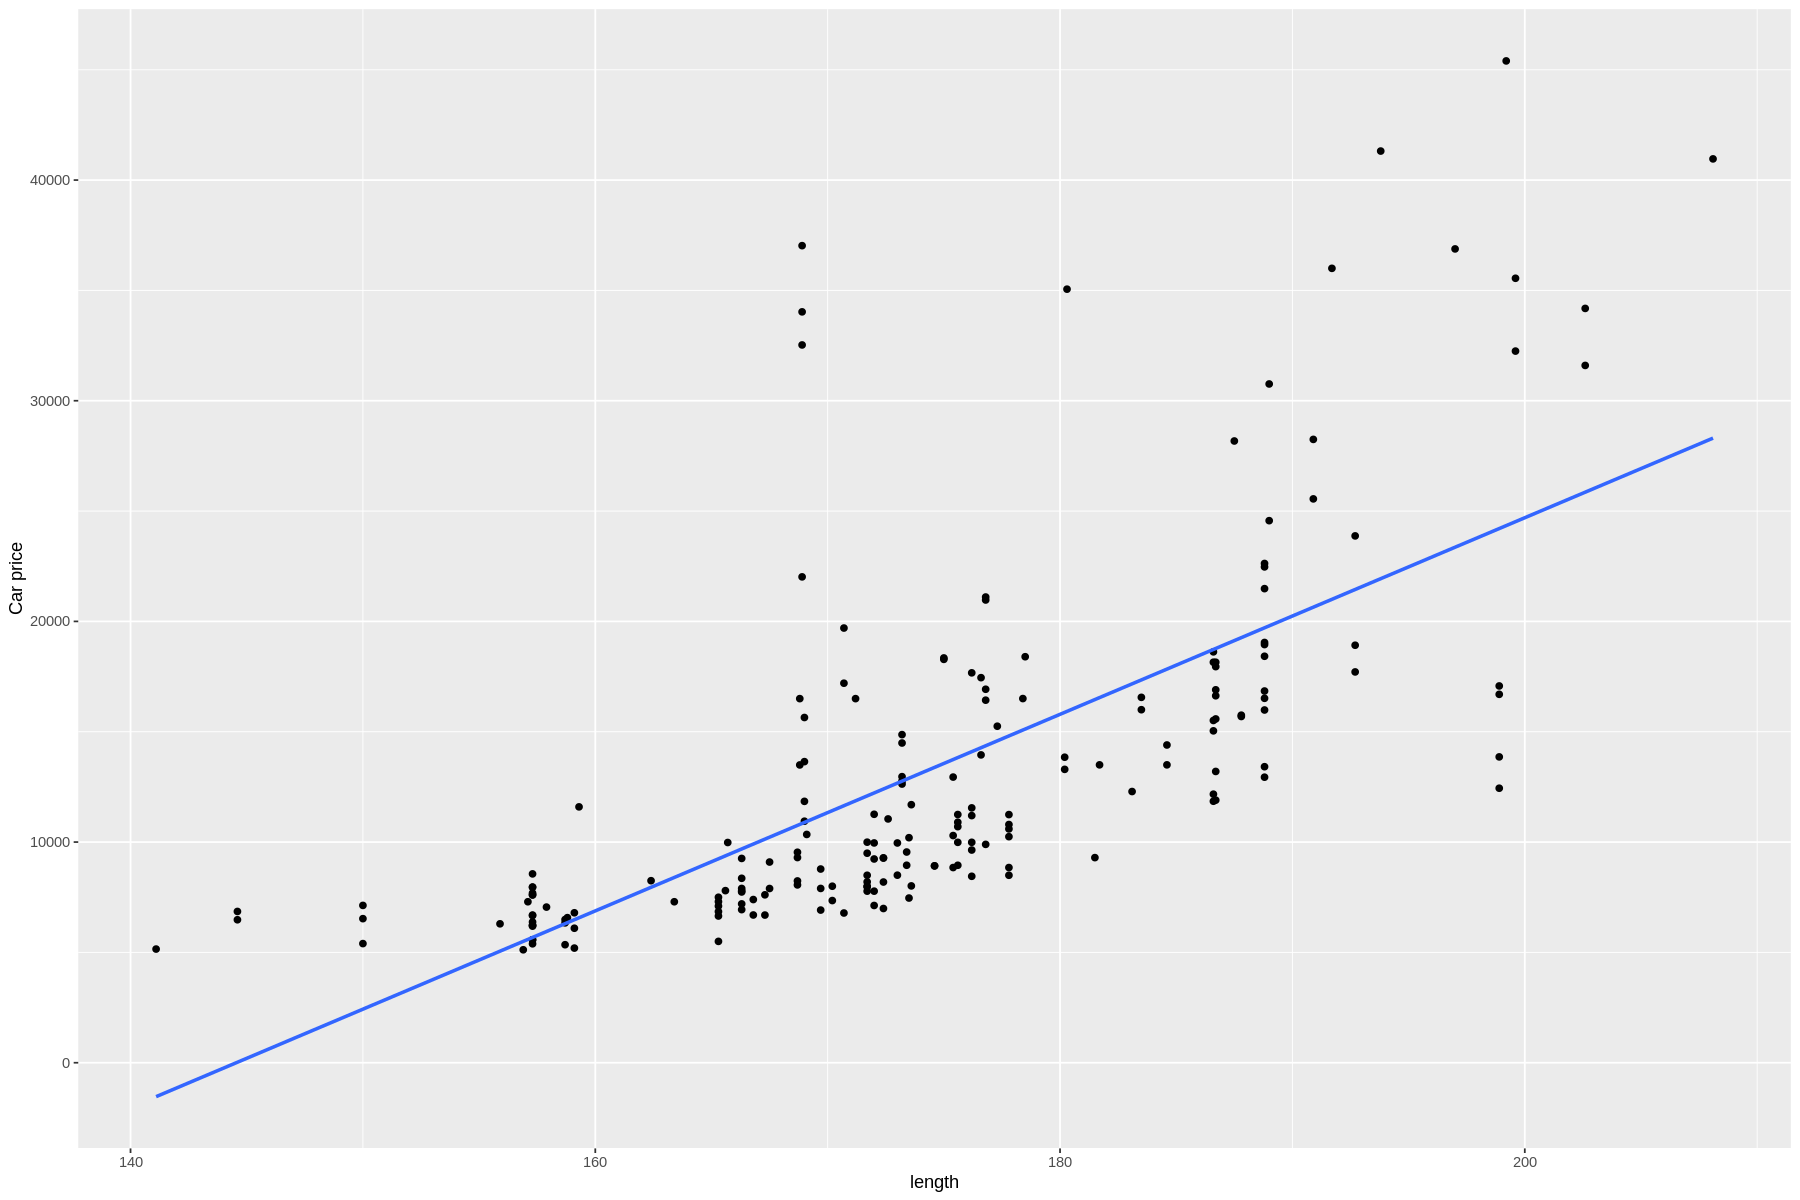

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


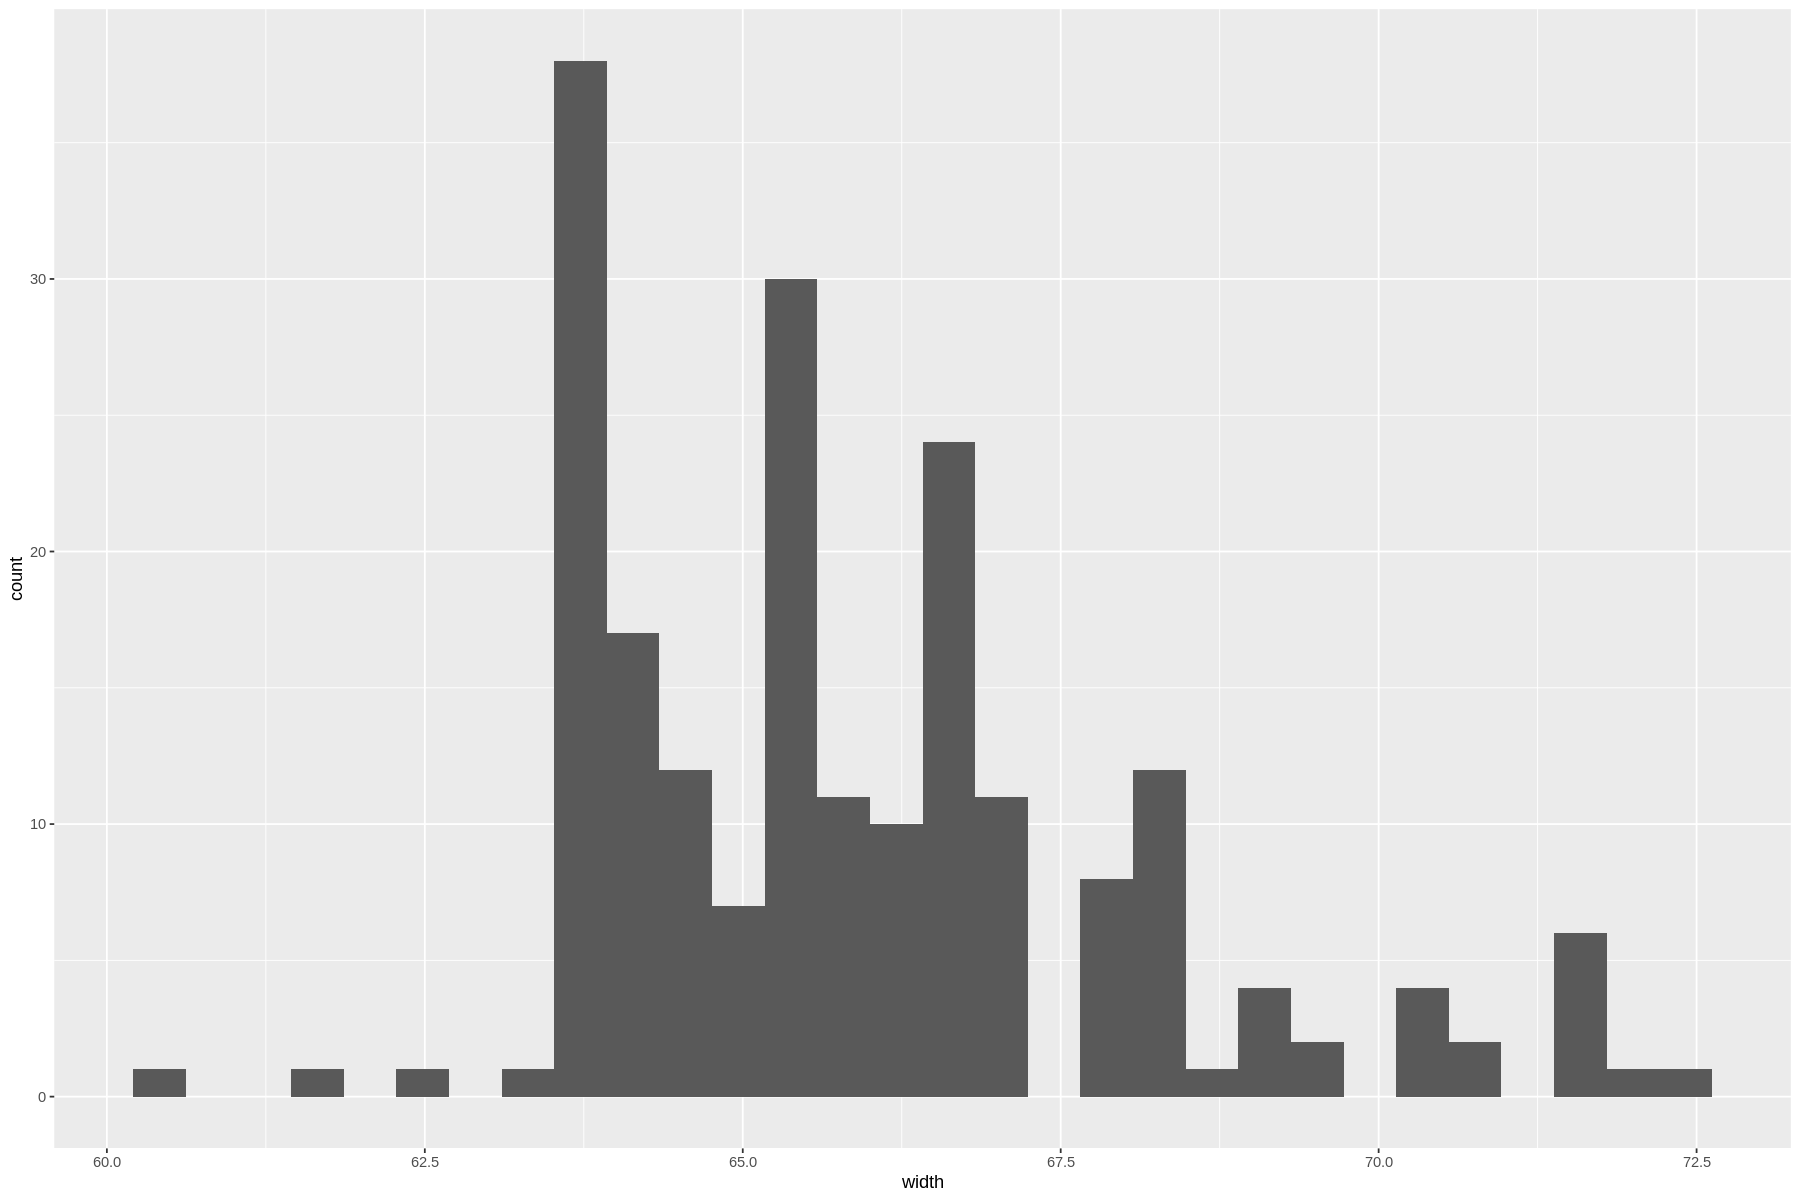

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



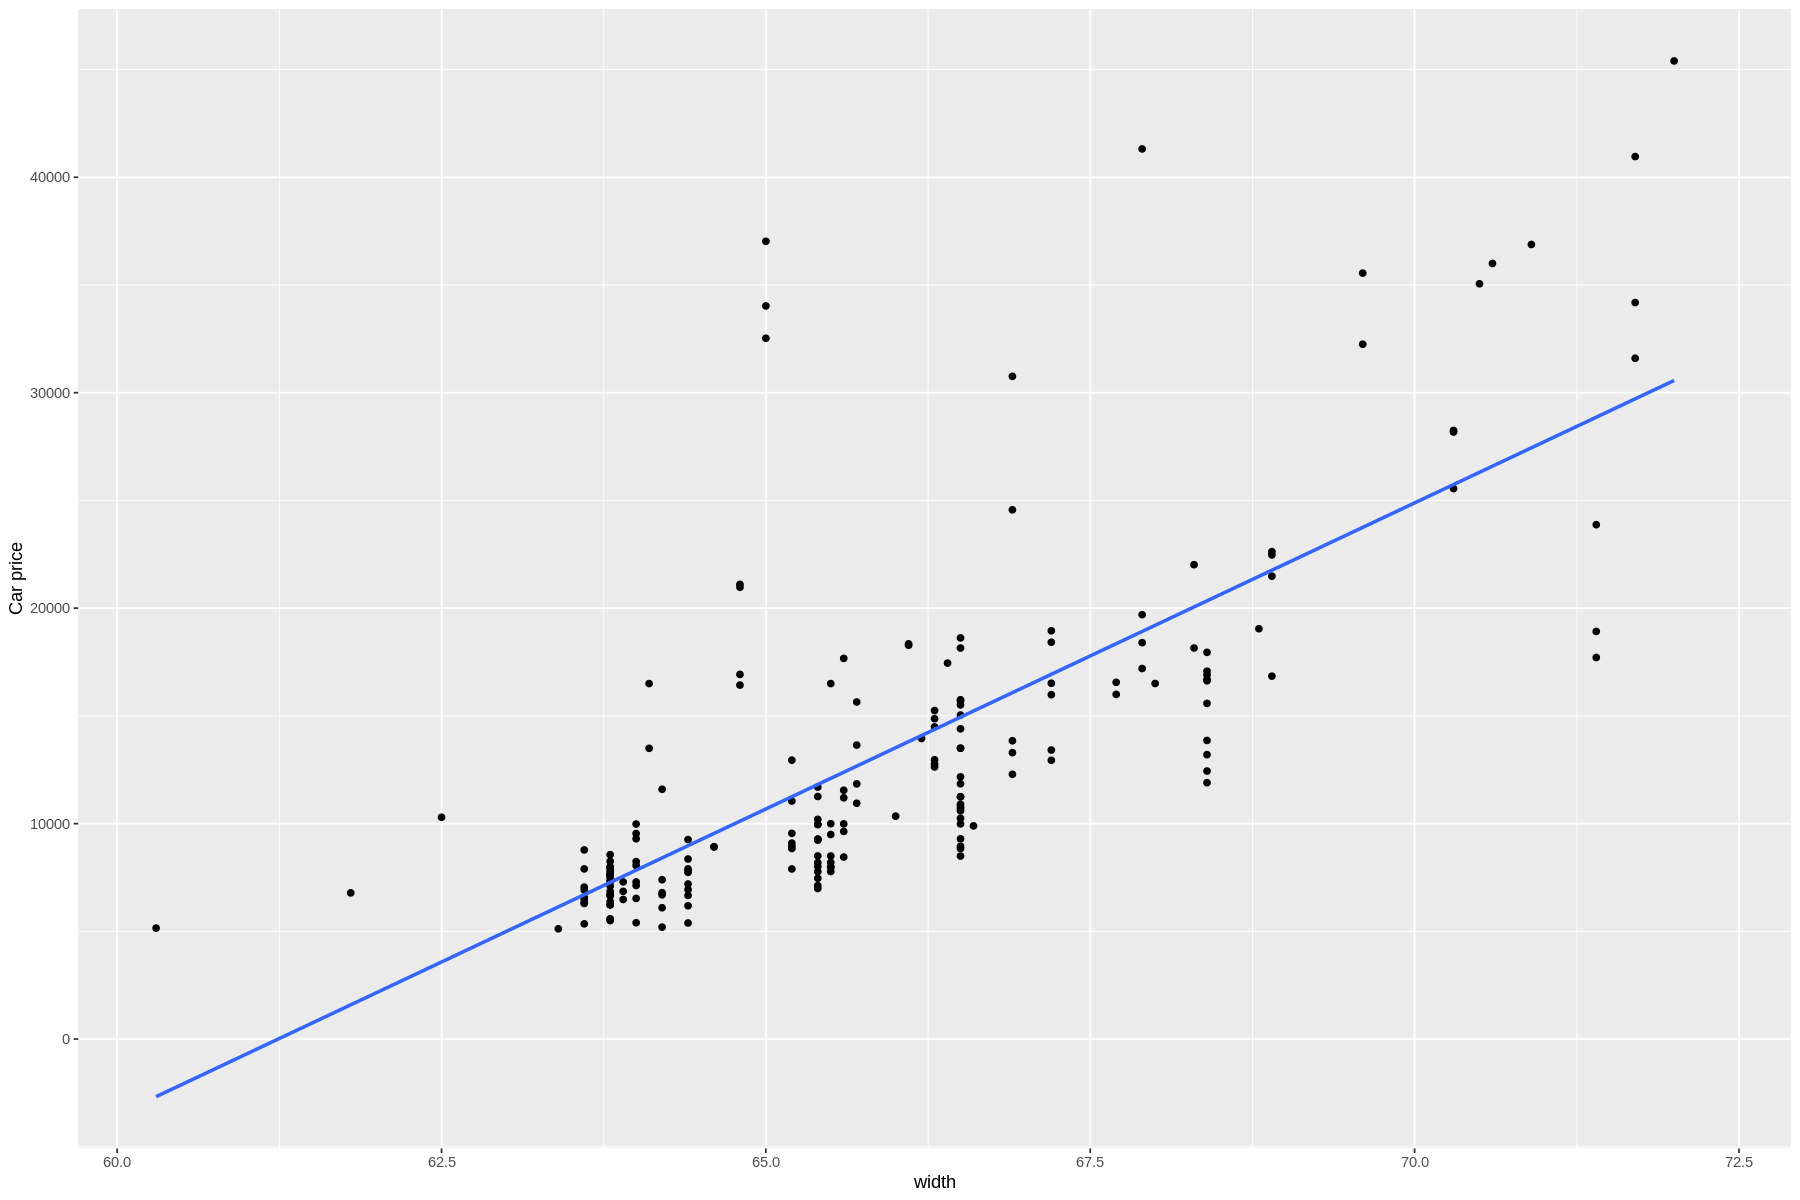

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Ignoring unknown parameters: bins”


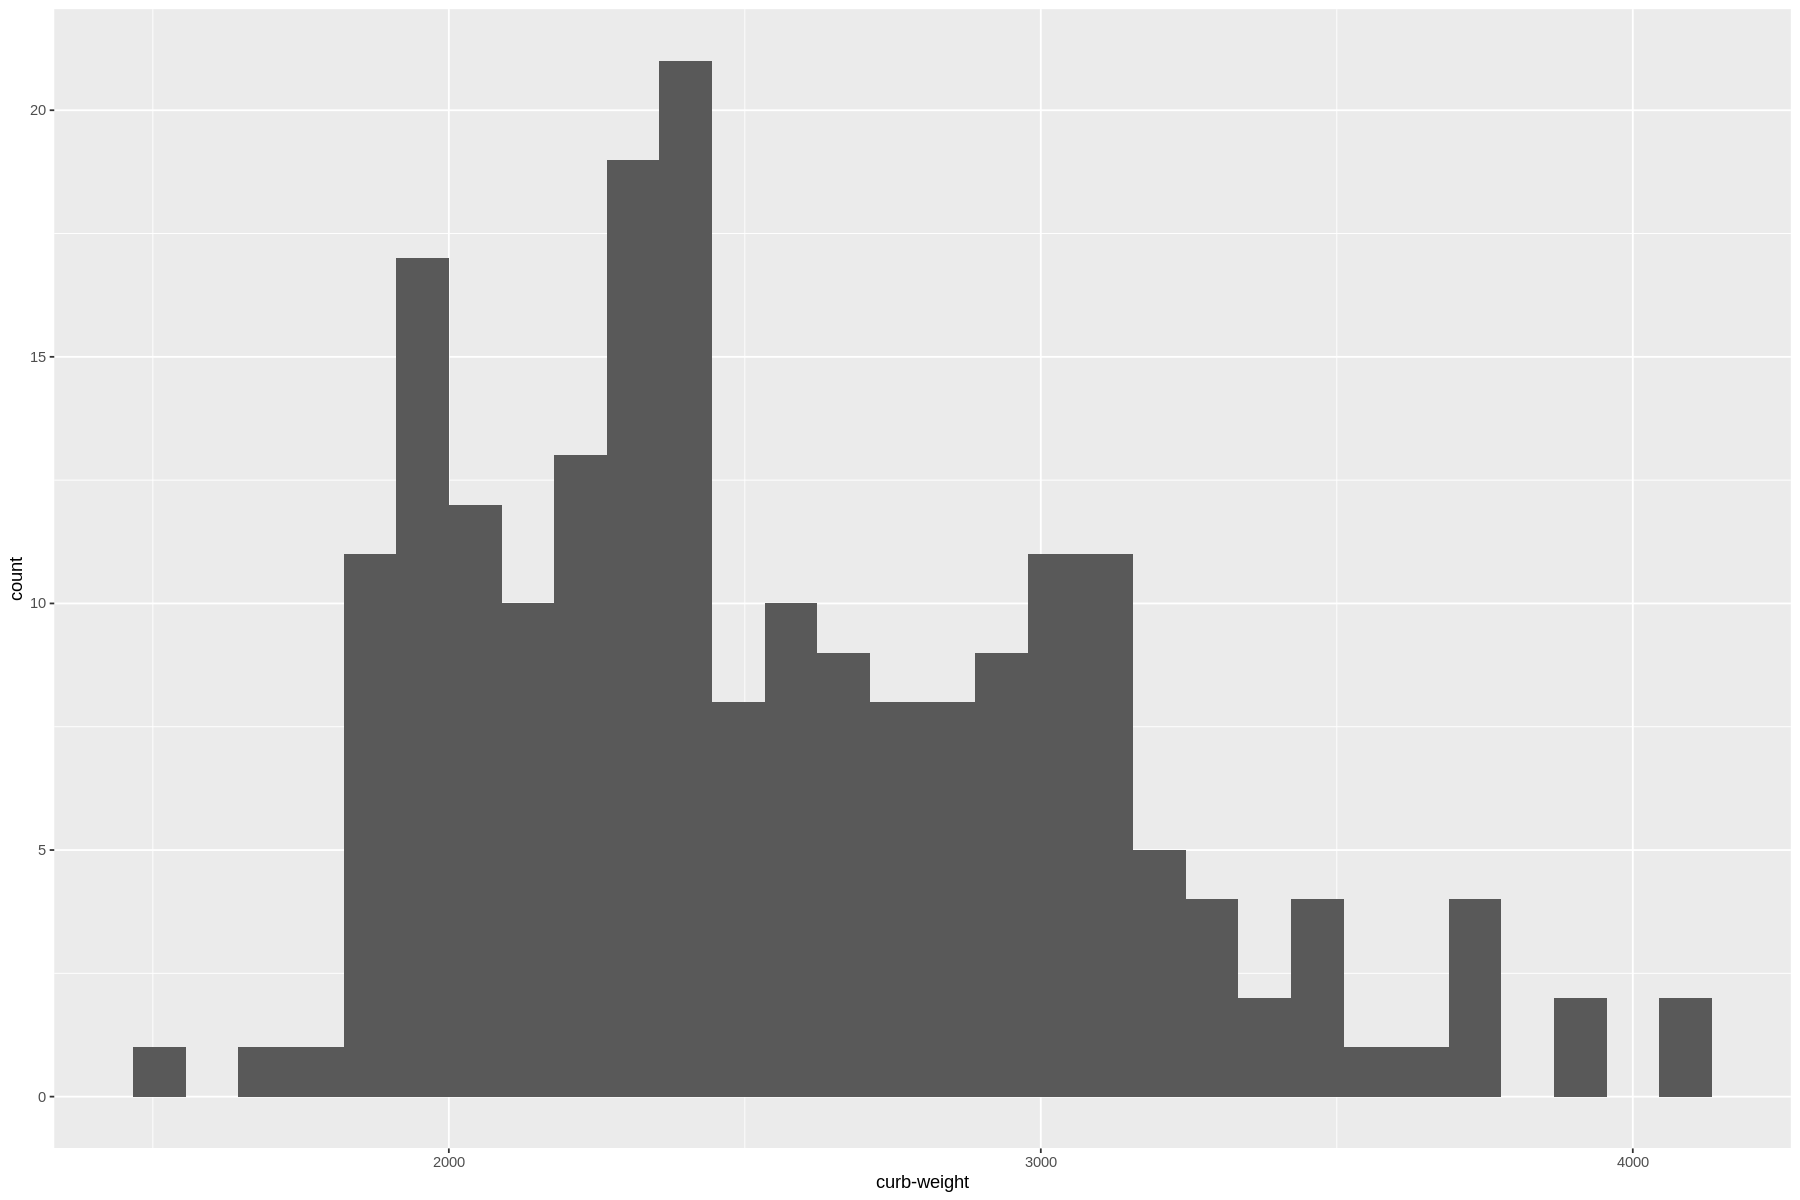

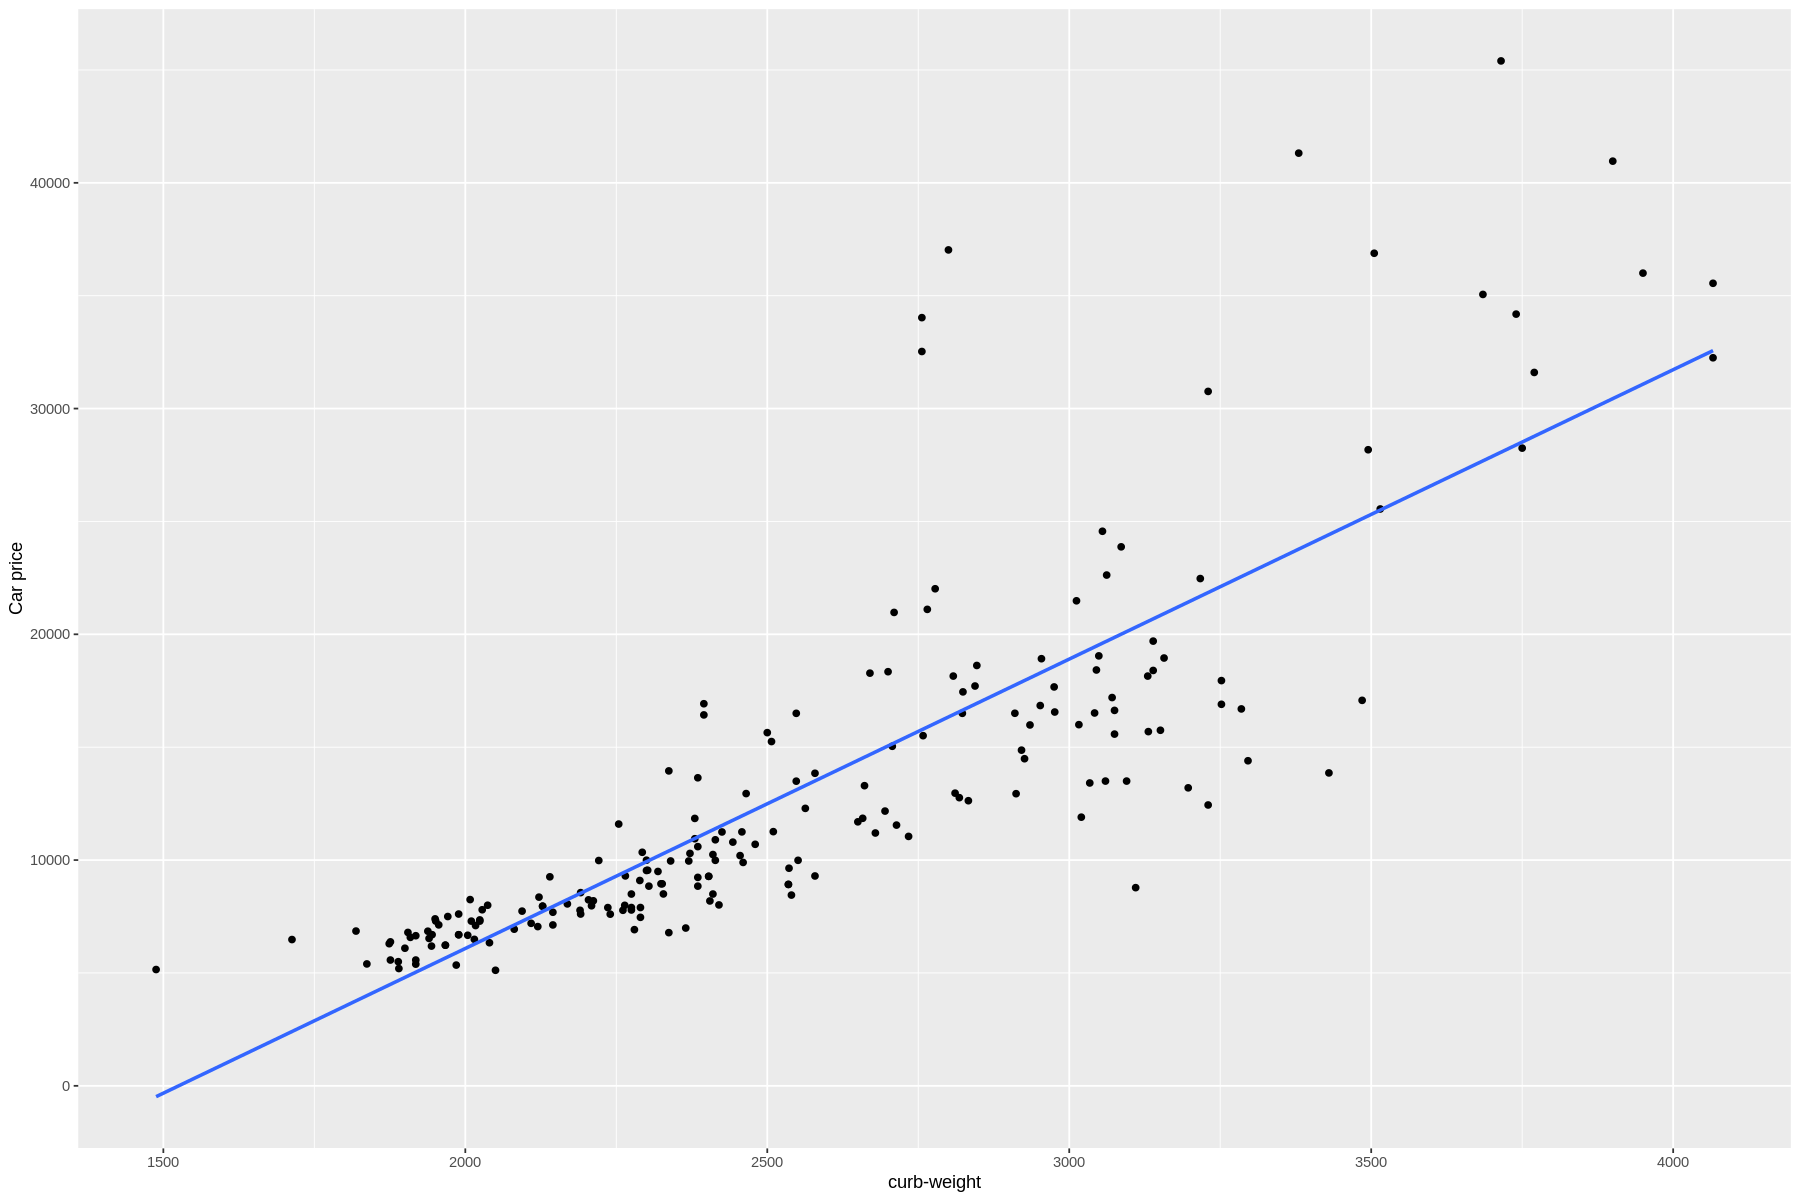

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



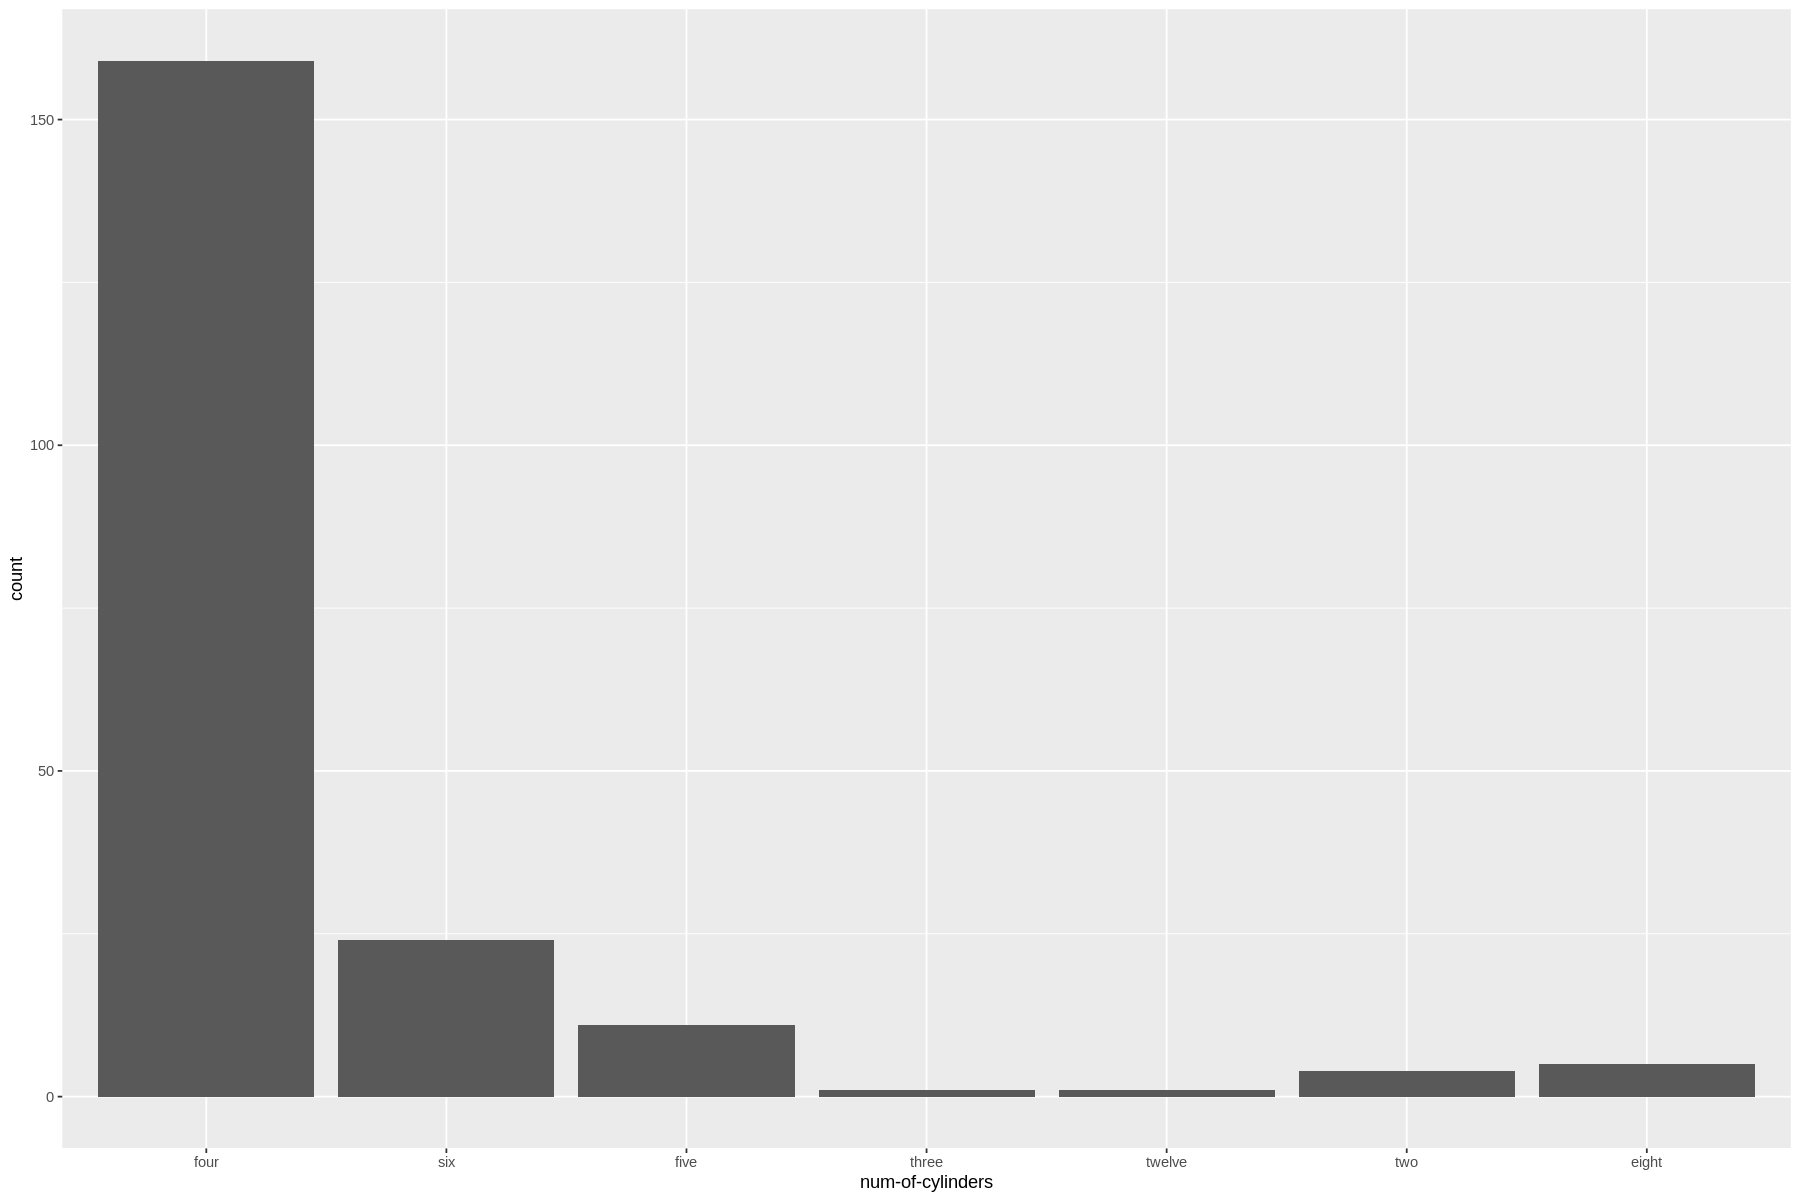

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


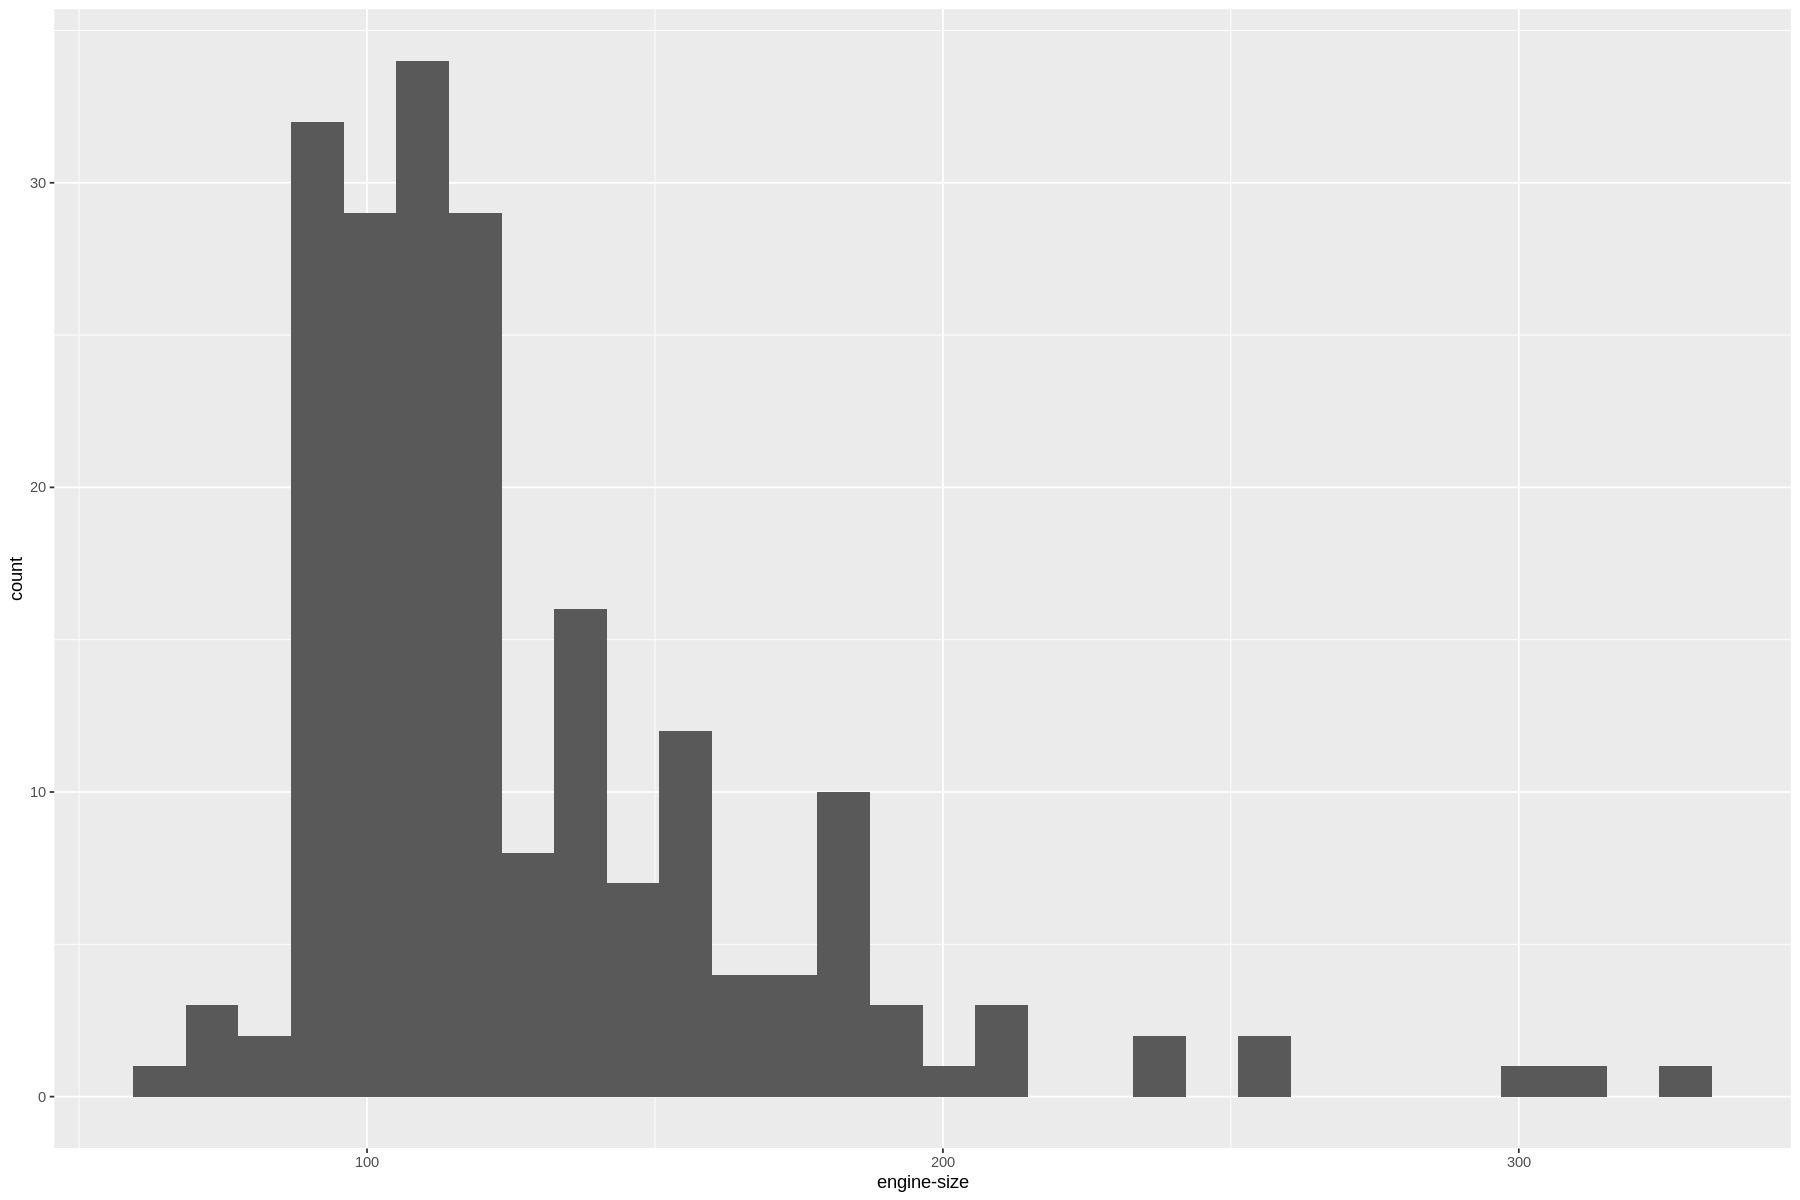

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


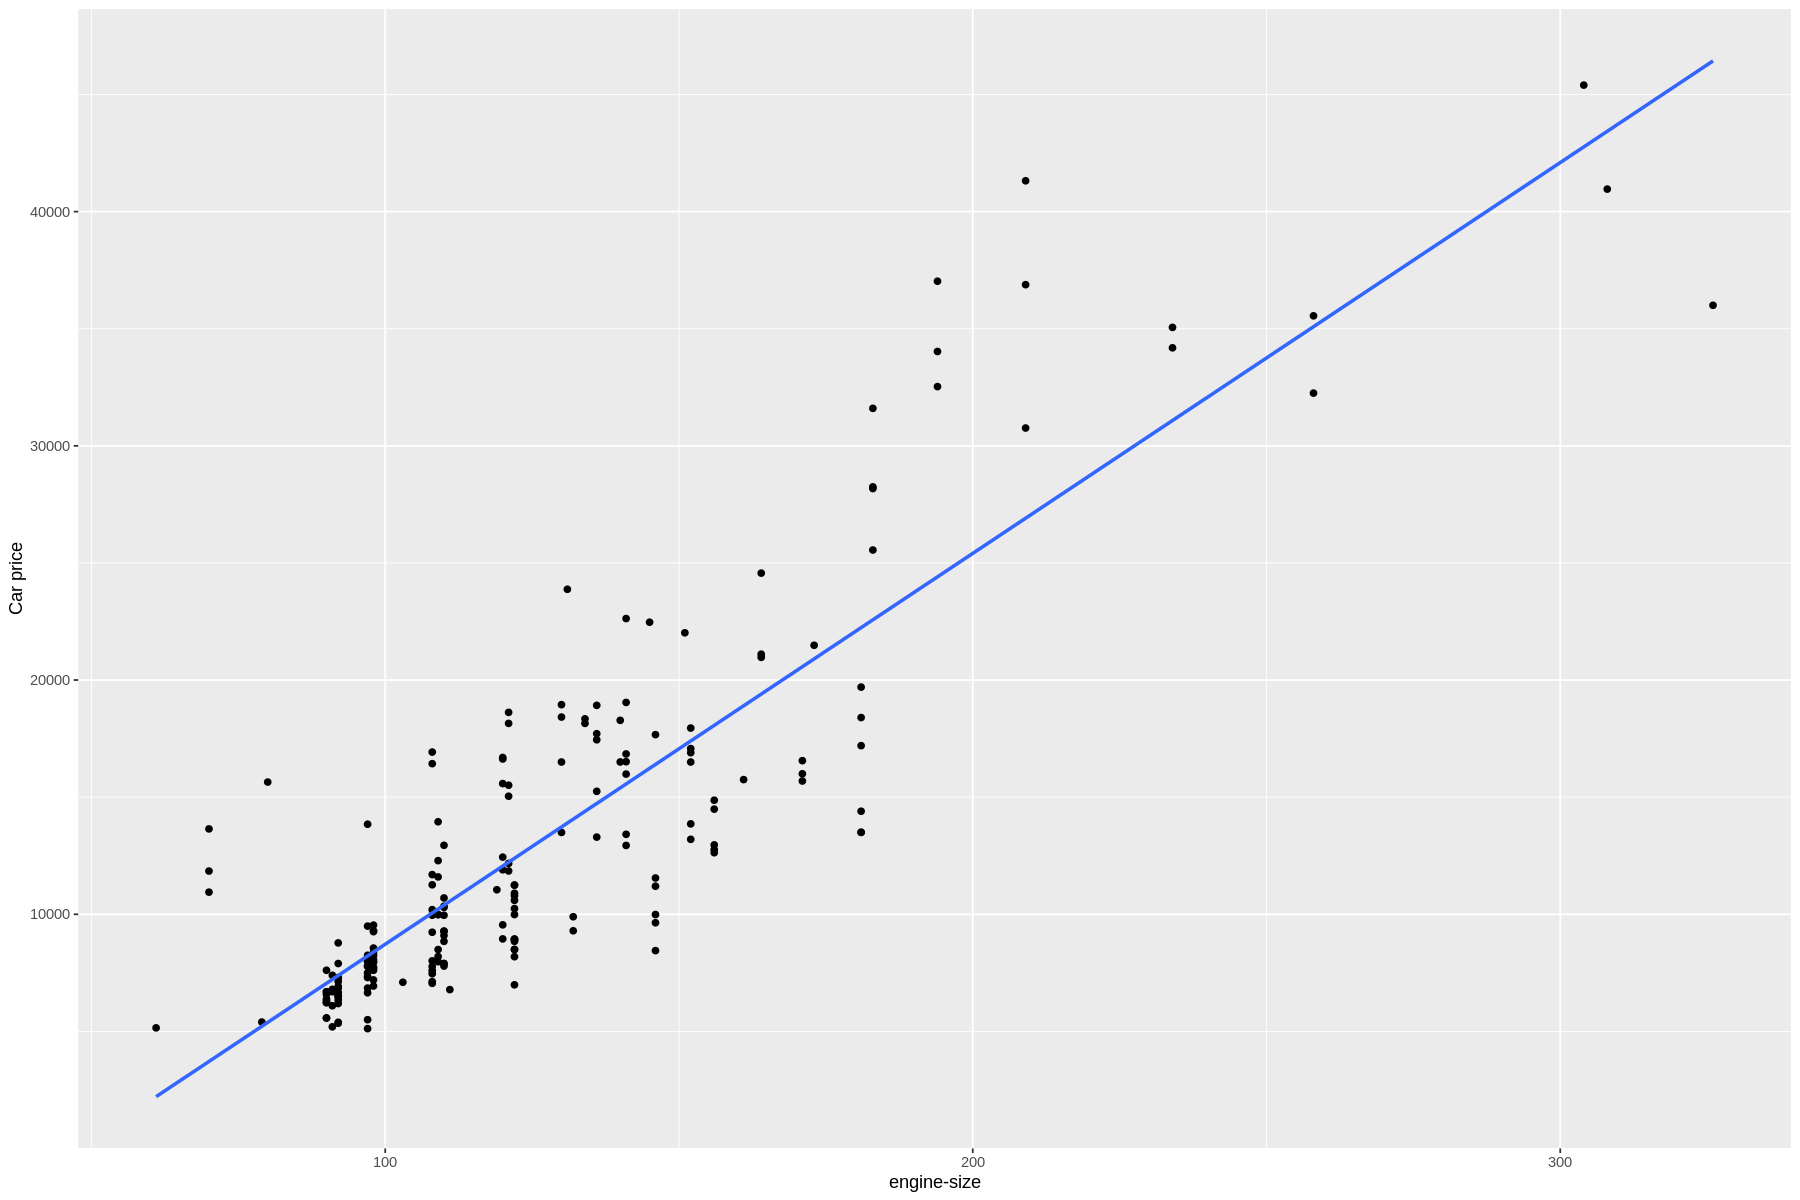

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


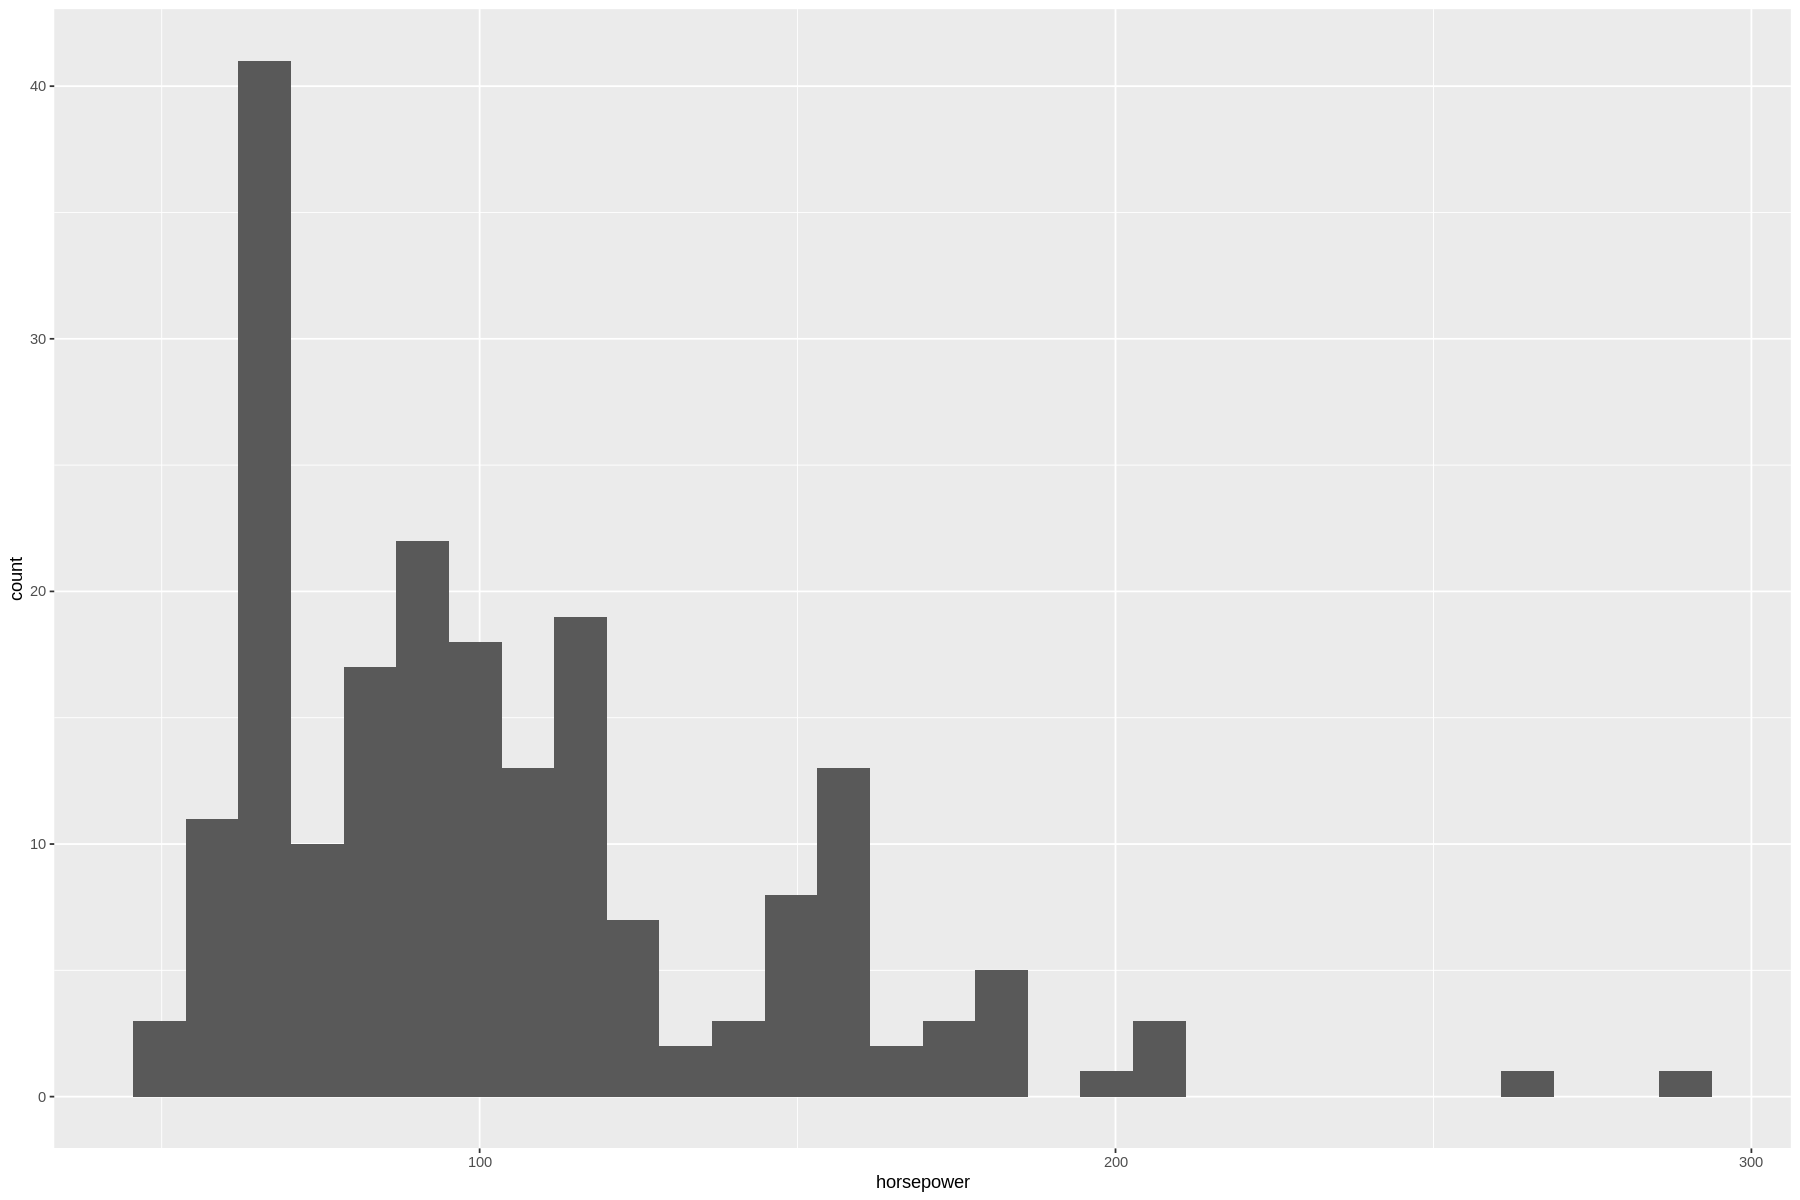

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



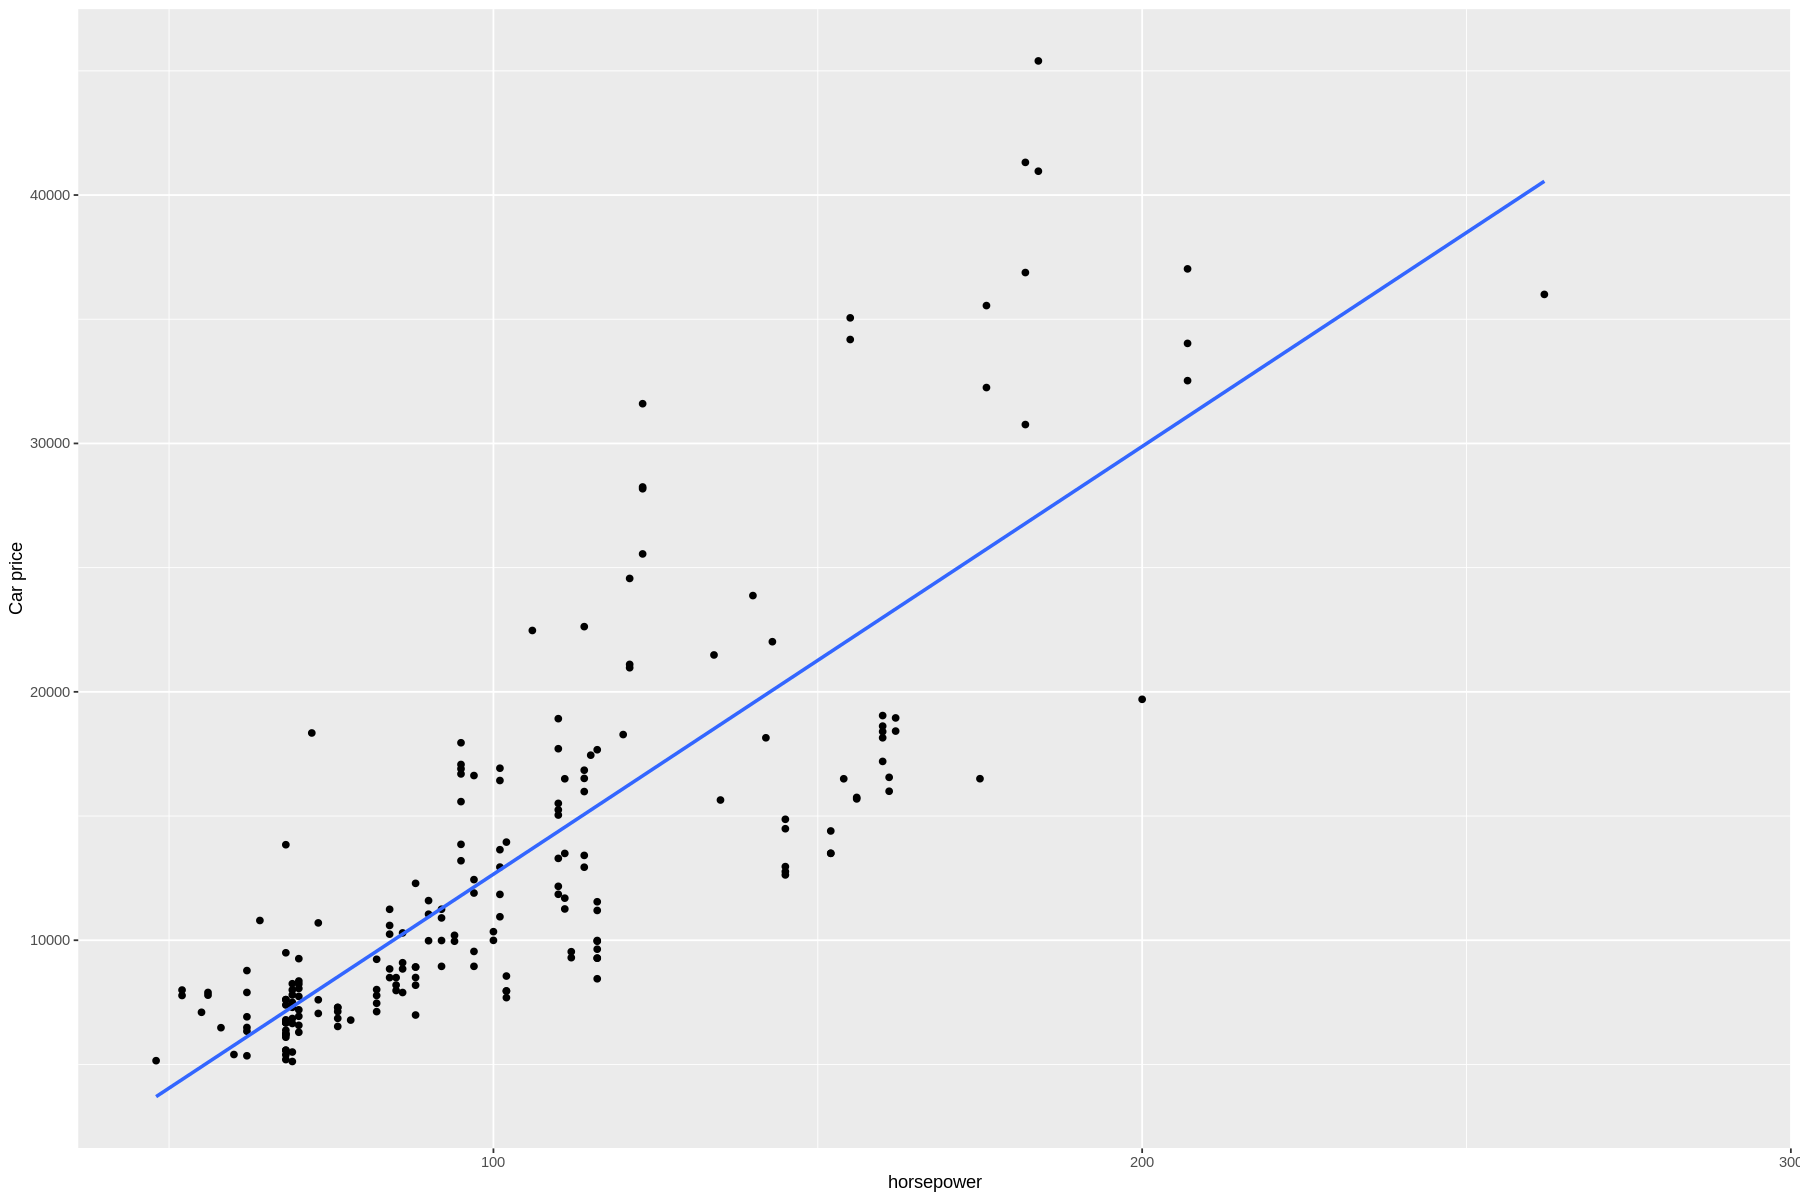

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


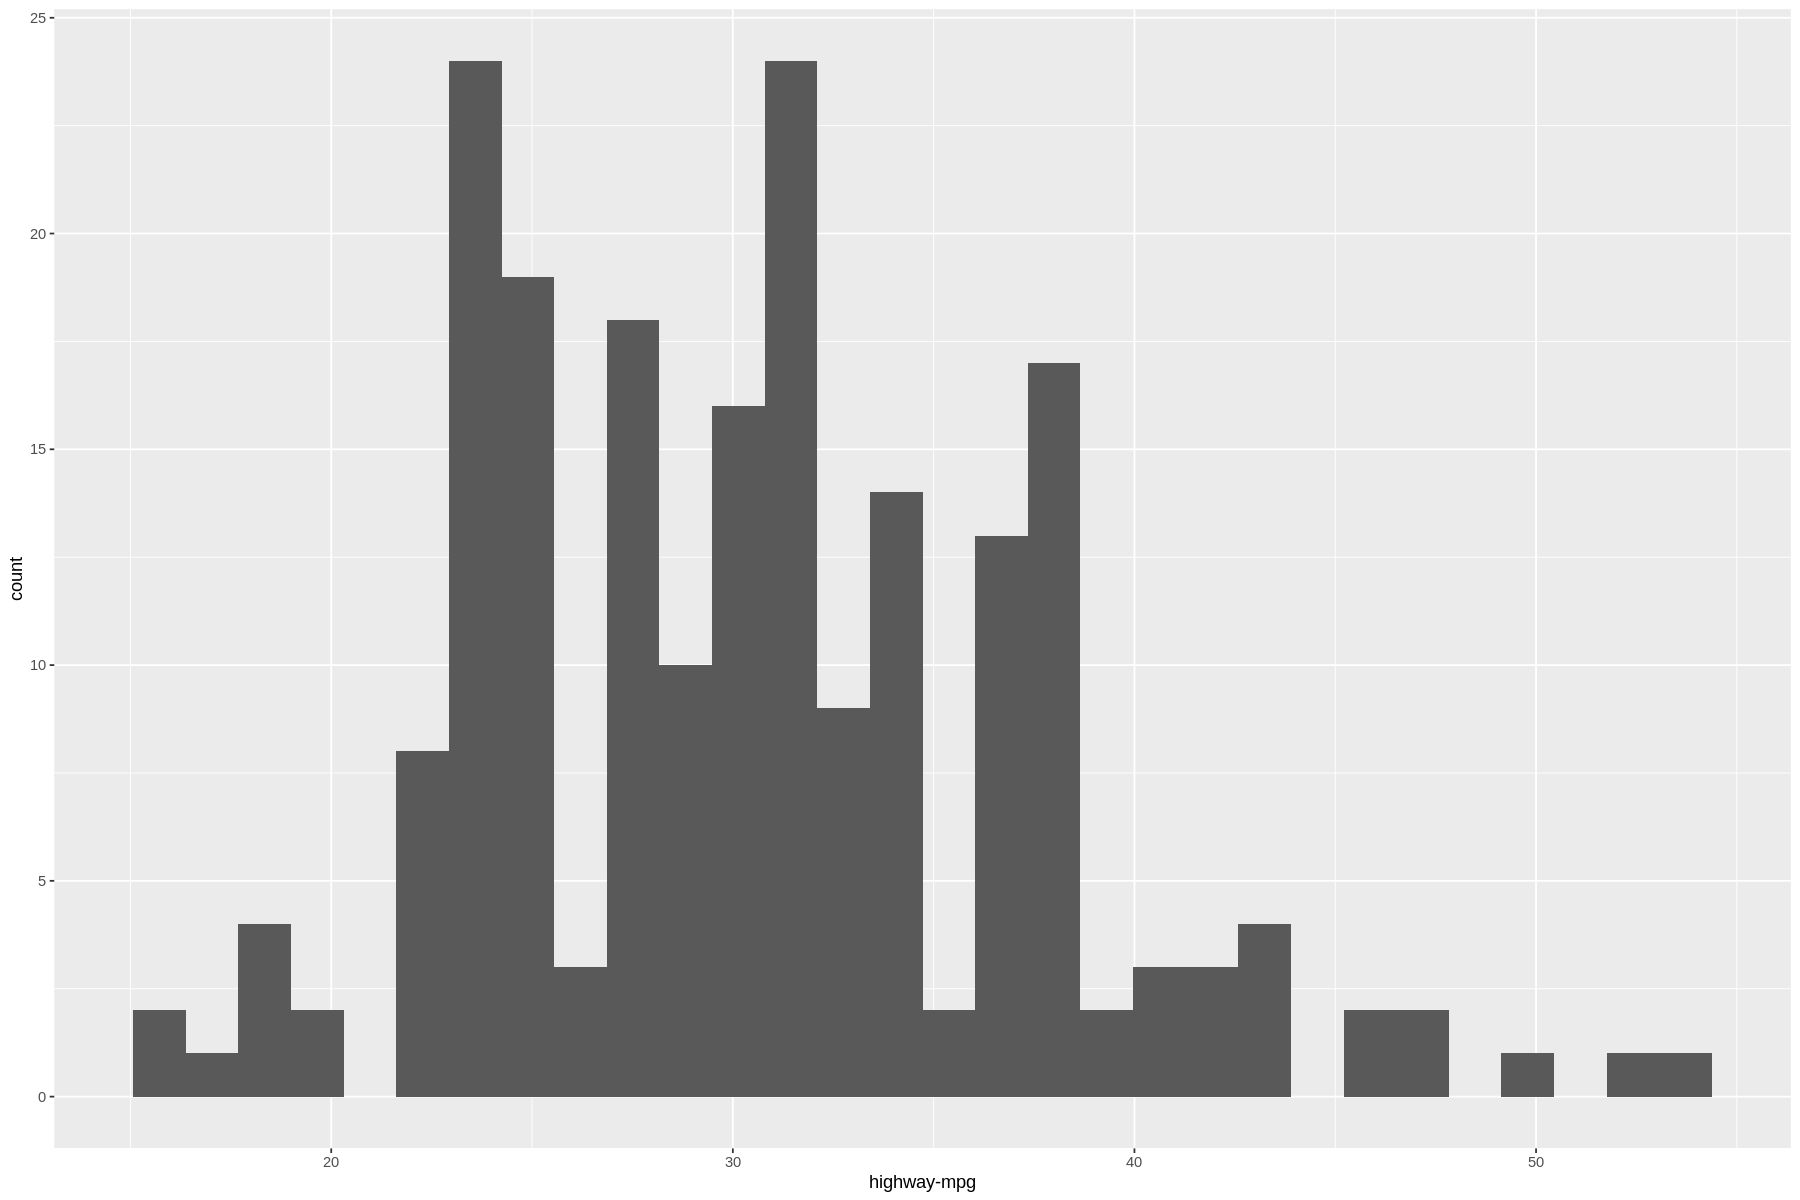

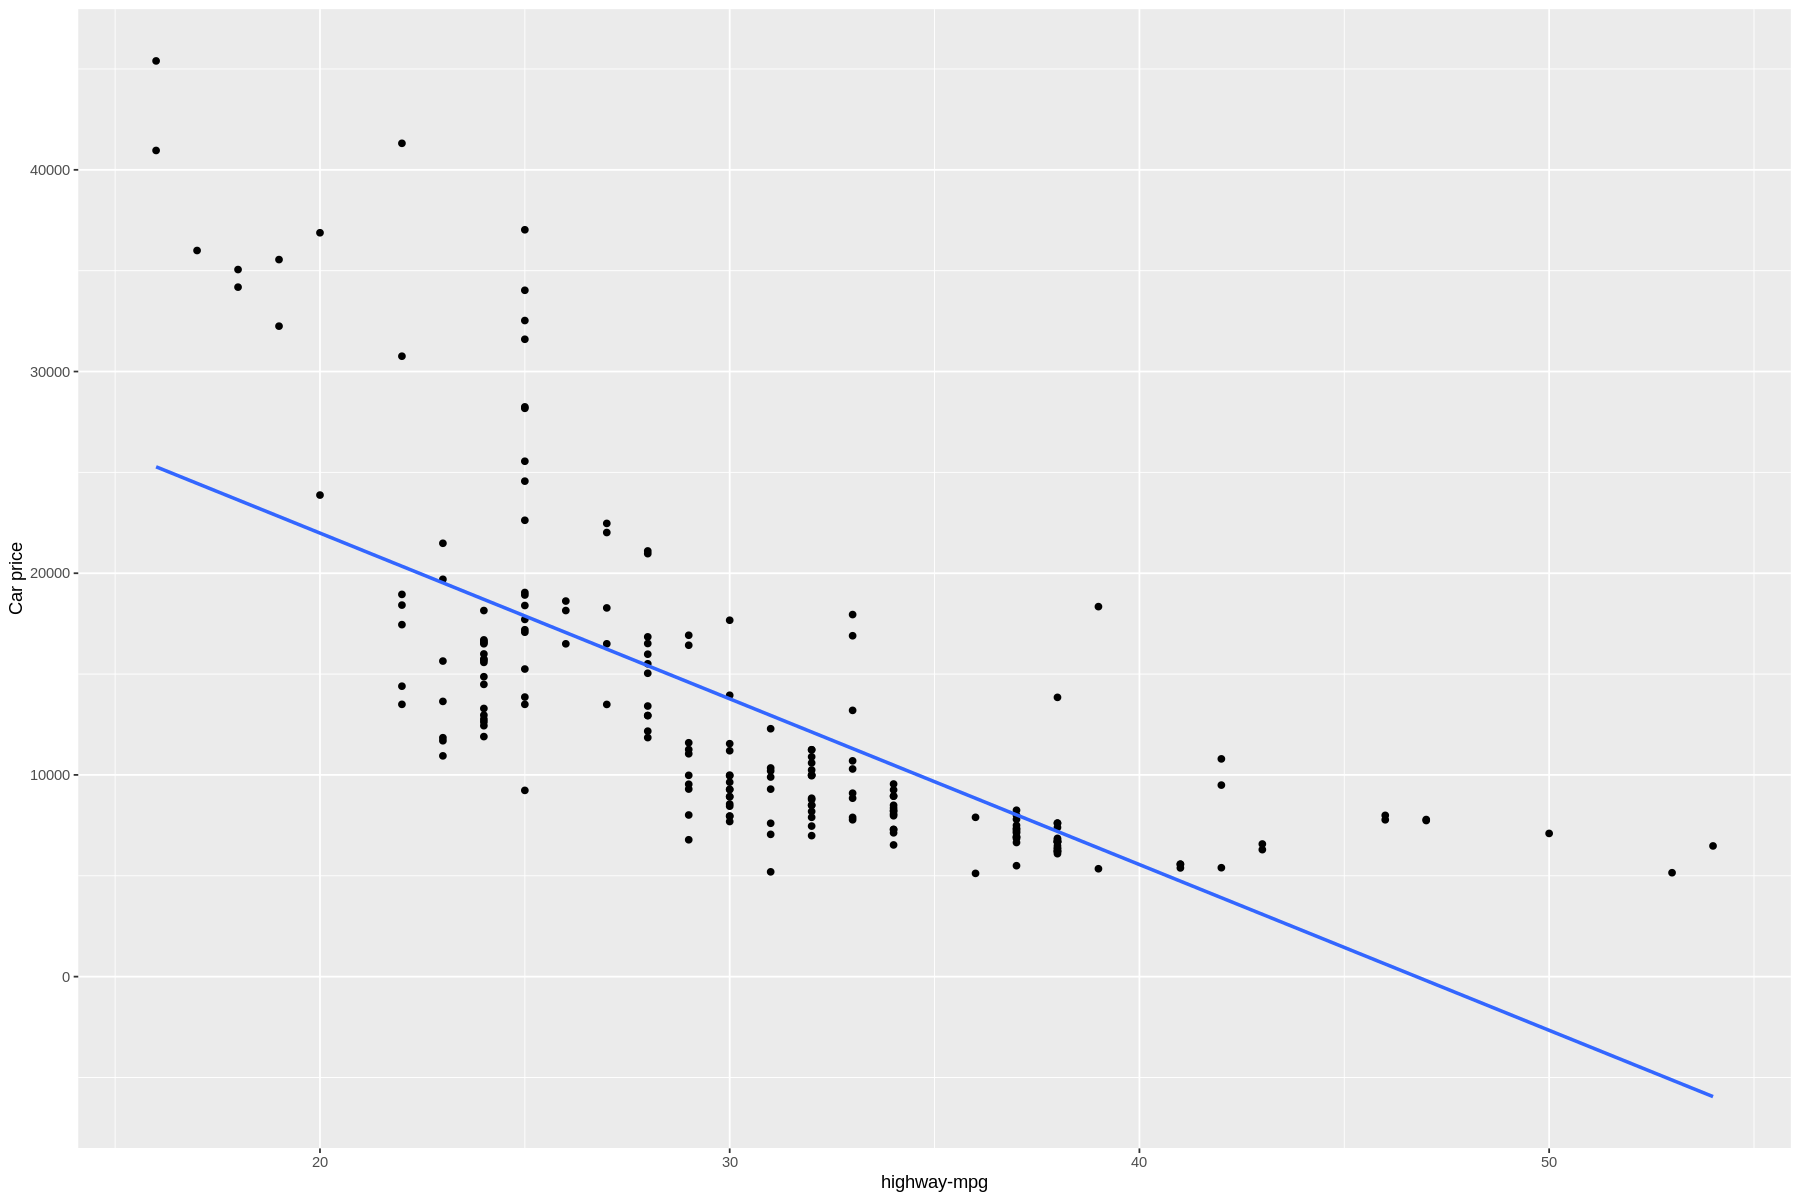

In [9]:
options(repr.plot.height = 10, repr.plot.width = 15)
for (x in 1:25){
    if (colnames(df_1[,x]) %in% nms){
    
    if (typeof(unlist(df_1[,x]))=="double"){
         print(df_1 %>%
         ggplot() +
         geom_histogram(aes(x = unlist(df_1[,x])))+
              xlab(colnames(df_1[,x])))
        
         print(df_1 %>% 
         ggplot(aes(x = unlist(df_1[,x]),y=unlist(df_1[,26]))) +
         geom_point()+
         geom_smooth(method=lm,formula=y~x,se=FALSE)+
              xlab(colnames(df_1[,x]))+
              ylab("Car price"))}
        
    else{
        print(df_1 %>%
            ggplot(aes(x=unlist(df_1[,x]))) +
            geom_bar(stat="count",bins=50)+
            xlab(colnames(df_1[,x])))
    
    }

}
      
    
    }

### some analysis for the plots above
- For the variable make, we can see most make are japanese brands, such as Toyota, Nissan and Mazada.
- For the variable length, we can see the distribution is approximately normal and is linearly correlated with price in a positive association.
- For the variable width, we can see the distribution is approximately normal and is linearly correlated with price in a positive association.
- For the variable curb-weight, we can see the distribution is skewed to right and is linearly correlated with price in a positive association.
- For the variable num-of-cylinders, we can see the most types are 4-cyclinders.
- For the variable engine-size, we can see the distribution is skewed to right and is linearly correlated with price in a positive association.
- For the variable horse-power, we can see the distribution is skewed to right and is linearly correlated with price in a positive association.
- For the variable highway-mpg, we can see the distribution is approximately normal and is linearly correlated with price in a negative association.